# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 1.3: Exemplos práticos**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código a seguir ilustra 2 cenários do uso de AM para resolver as tarefas de regressão e classificação, respectivamente.*

## Exemplo de Regressão

O objetivo é treinar um modelo para predizer o valor dos preços de imóveis considerando a área, o número de quartos e o número de banheiros disponíveis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = {
    'Tamanho_Area': [120, 150, 180, 200, 220, 250, 280, 300, 320, 350,
                     180, 200, 220, 240, 260, 280, 300, 320, 340, 360],  # em metros quadrados
    'Num_Quartos': [3, 3, 4, 4, 4, 3, 4, 4, 4, 5,
                     3, 3, 4, 4, 4, 3, 4, 4, 4, 5],
    'Num_Banheiros': [2, 2, 2, 3, 3, 2, 3, 3, 3, 3,
                      2, 2, 2, 3, 3, 2, 3, 3, 3, 3],
    'Valor_Venda': [250000, 280000, 320000, 350000, 380000,
                    290000, 330000, 360000, 390000, 420000,
                    280000, 310000, 340000, 370000, 400000,
                    310000, 340000, 370000, 400000, 430000]  # em reais
}

# Convertendo o dicionário em um DataFrame do Pandas
df = pd.DataFrame(data)
df.head()

,Tamanho_Area,Num_Quartos,Num_Banheiros,Valor_Venda
0,120,3,2,250000
1,150,3,2,280000
2,180,4,2,320000
3,200,4,3,350000
4,220,4,3,380000


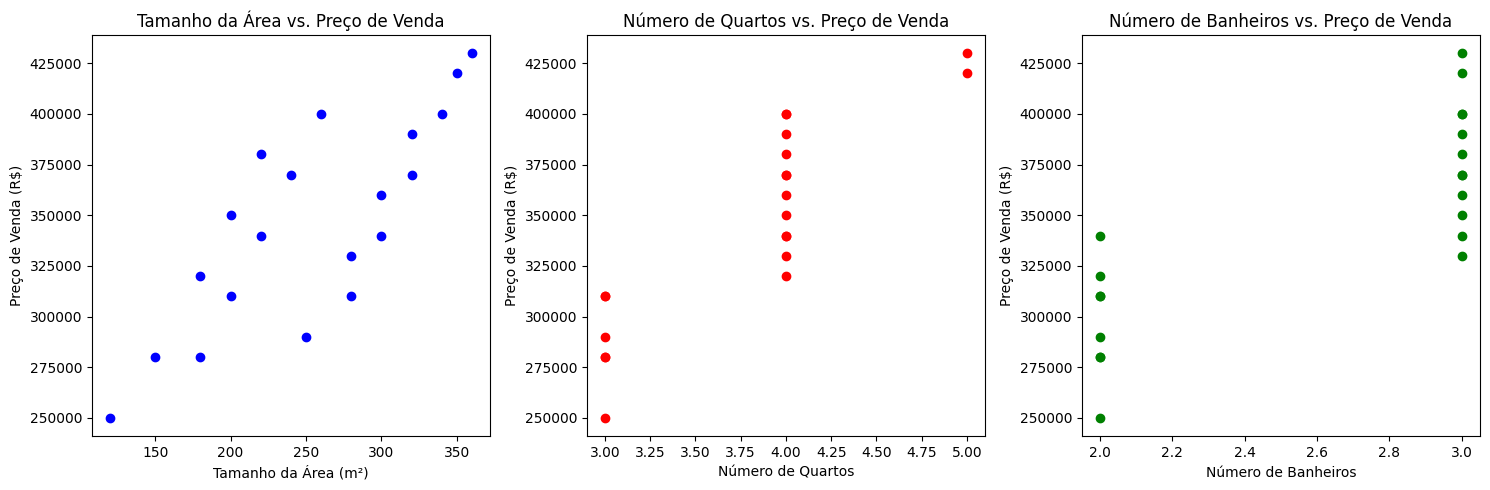

In [ ]:
# Criando o scatter plot
plt.figure(figsize=(15, 5))

# Tamanho da área vs. Preço de Venda
plt.subplot(1, 3, 1)
plt.scatter(df['Tamanho_Area'], df['Valor_Venda'], color='blue')
plt.title('Tamanho da Área vs. Preço de Venda')
plt.xlabel('Tamanho da Área (m²)')
plt.ylabel('Preço de Venda (R$)')

# Número de quartos vs. Preço de Venda
plt.subplot(1, 3, 2)
plt.scatter(df['Num_Quartos'], df['Valor_Venda'], color='red')
plt.title('Número de Quartos vs. Preço de Venda')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço de Venda (R$)')

# Número de banheiros vs. Preço de Venda
plt.subplot(1, 3, 3)
plt.scatter(df['Num_Banheiros'], df['Valor_Venda'], color='green')
plt.title('Número de Banheiros vs. Preço de Venda')
plt.xlabel('Número de Banheiros')
plt.ylabel('Preço de Venda (R$)')

plt.tight_layout()
plt.show()

In [ ]:
# Separando os dados em características (X) e rótulo (y)
X = df[['Tamanho_Area', 'Num_Quartos', 'Num_Banheiros']]
y = df['Valor_Venda']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado usando os dados de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (RMSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (RMSE): 234957215.74062663
Coeficiente de Determinação (R²): 0.8806566523222213


In [ ]:
X_test

,Tamanho_Area,Num_Quartos,Num_Banheiros
0,120,3,2
17,320,4,3
15,280,3,2
1,150,3,2


In [ ]:
results = pd.DataFrame({'Valor_Real': y_test, 'Valor_Predito': y_pred.round(0)})
results

,Valor_Real,Valor_Predito
0,250000,278808.0
17,370000,376161.0
15,310000,302137.0
1,280000,283182.0


In [ ]:
# Gerando novas instâncias sem rótulo
novas_instancias = {
    'Tamanho_Area': [50, 180, 220, 260, 500],  # em metros quadrados
    'Num_Quartos': [1, 3, 4, 4, 7],
    'Num_Banheiros': [1, 2, 3, 3, 5]
}

# Convertendo o dicionário em um DataFrame do Pandas
novos_dados = pd.DataFrame(novas_instancias)

model.predict(novos_dados).round(0)

array([158778., 287556., 361580., 367412., 580421.])

## Exemplo de Classificação

O objetivo é treinar um modelo para reconhecer a espécie de uma planta utilizando o tamanho e a largura das pétalas e das sépalas.

In [ ]:
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

Informações sobre o conjunto de dados Iris:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_name        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

As primeiras linhas do DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0         

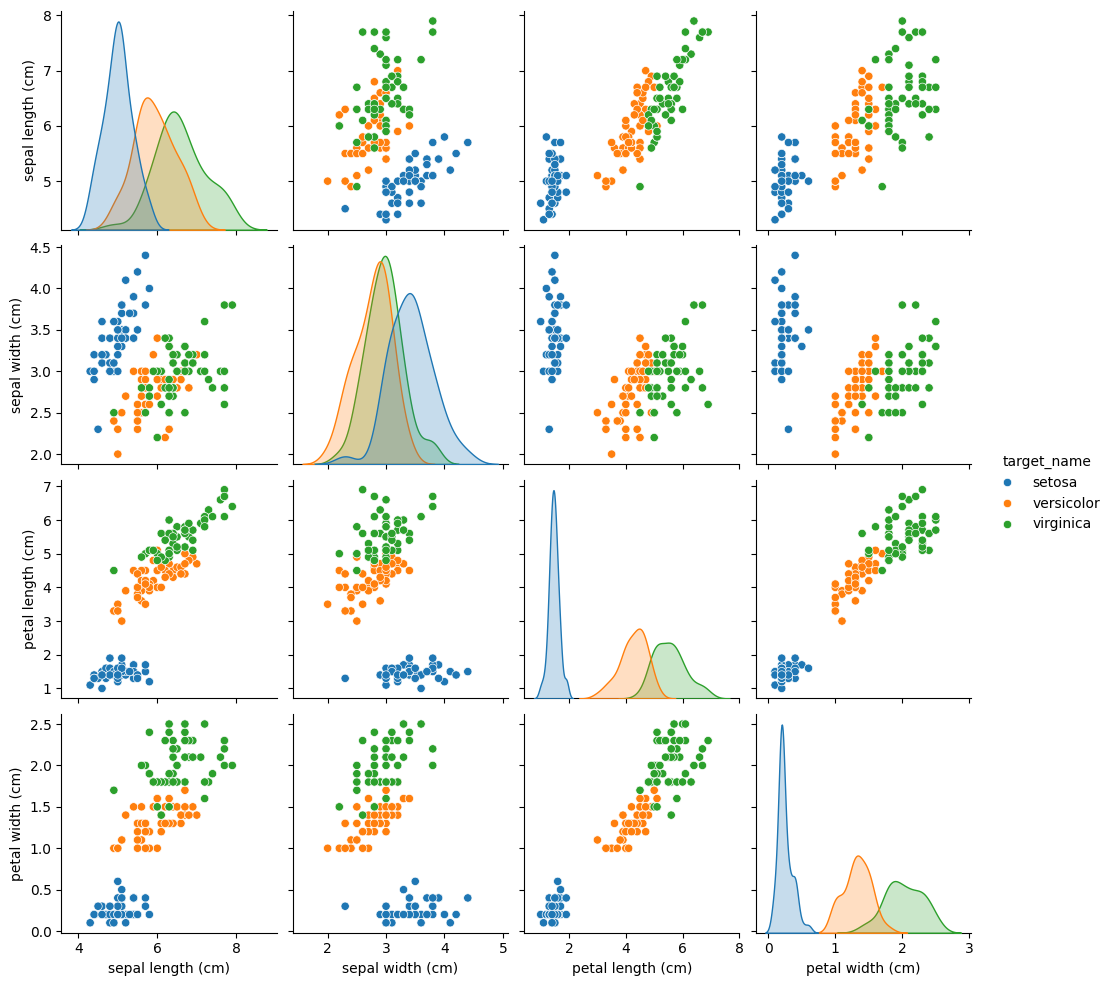

In [ ]:
# Carregando o conjunto de dados Iris
iris = load_iris()

# Convertendo o conjunto de dados em um DataFrame do Pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target_name'] = iris.target_names[iris.target]

# Exibindo algumas informações básicas sobre o conjunto de dados
print("Informações sobre o conjunto de dados Iris:")
print(df.info())

# Exibindo as primeiras linhas do DataFrame
print("\nAs primeiras linhas do DataFrame:")
print(df.head())

# Plotando a relação entre os atributos e as classes usando pairplot do Seaborn
print("\nRelação entre os atributos e as classes:")
sns.pairplot(df, hue='target_name')
plt.show()

In [ ]:
# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Criando o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado usando os dados de teste
y_pred = model.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Exibindo o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



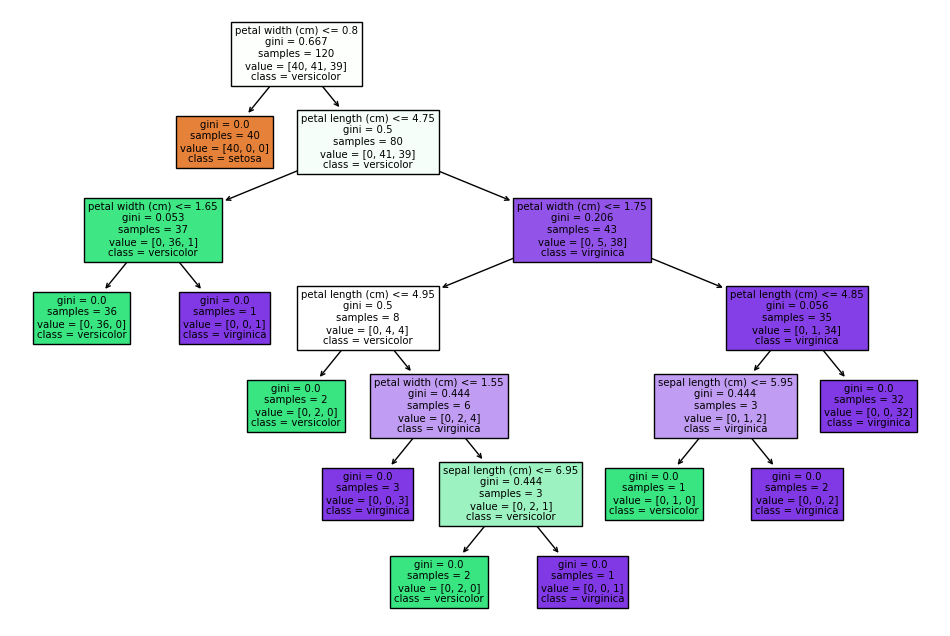

In [ ]:
# Visualizando a árvore de decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()